# Tobig's 19기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [7]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [8]:
# parameter 개수
N = len(X_train.loc[0])

In [9]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.09144413, 0.19460076, 0.73436612])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [10]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i]*parameters[i]
    return z

## Logistic Function

## $p = 1/(1+\epsilon ^{-z})$

In [23]:
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1/(1 + np.exp(-z))
    return p

In [24]:
logistic(X_train.iloc[1], parameters)

0.5876956435772664

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = - \Sigma [ylogH(x) + (1-y)log(1-H(x))] $ 

In [25]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss = -(y*np.log(p)+(1-y)*np.log(1-p))
    return loss

In [26]:
def mse_i(X, y, parameters):
    y_hat = dot_product(X,parameters)
    loss = np.power(y-y_hat, 2)
    return loss

In [27]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X, y, parameters)
    loss = loss/n #loss 평균값으로 계산
    return loss

In [28]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

0.9597541227028826

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)= -\Sigma(y_i - \theta^TX_i)X_ij$ 
## ${\partial\over{\partial \theta_j}}l(p)= -\Sigma(y_i - p_i)X_ij$ 

In [89]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = dot_product(X,parameters)
        gradient = -(y-y_hat)*X[j]
    else:
        p = logistic(X,parameters)
        gradient = -(y-p)*X[j]
    return gradient

In [91]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.1259981103557093

In [92]:
'''
from IPython.display import Image

Image("C:/Users/rhskr/Desktop/배치알고리즘_구현.png")
'''

'\nfrom IPython.display import Image\n\nImage("C:/Users/rhskr/Desktop/배치알고리즘_구현.png")\n'

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [93]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)
    
    return gradients

In [94]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[35.45980240518859, 6.09109335973812, 42.37174907456014]

## mini-batch
인덱스로 미니 배치 나누기

In [95]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
#### 설명: 배치사이즈는 몇 개의 관측치에 대한 예측을 하고, 레이블 값과 비교를 하는지를 설정하는 파라미터입니다. 만약 데이터의 크기가 100이고 배치사이즈가 100이면, 전체 데이터에 대해 모두 예측한 뒤 실제 레이블 값과 비교한 후 가중치 갱신을 합니다. 배치사이즈가 10이면 10개 데이터에 대해 예측한 뒤 실제 레이블 값과 비교하며 가중치 갱신도 10번 발생합니다. batch_idx함수를 살펴보면 데이터의 개수를 설정한 배치사이즈로 나누어 n / batch_size 만큼의 데이터 셋을 만드는 걸 확인할 수 있습니다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [96]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate / n
    
    parameters -= gradients   # parameter update
    return parameters

In [97]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.08671135, 0.19378463, 0.72871154])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: 반복횟수
- num_epoch: 총 학습 횟수
<br>

BGD: 데이터가 1000개 있을 때 모든 데이터에 대하여 각각 Loss function을 계산하고, 그들의 기댓값을 오차(ε)로 하고, 그 오차를 최소화시키는 방향으로 weight들을 업데이트합니다.

SGD: 데이터가 1000개가 있을 때 각 데이터에 대하여 Loss function을 계산하고, 그 함수를 최소화하는 방향으로 W를 업데이트합니다. 즉 BGD는 1000개의 데이터 모두를 고려한다고 하면, SGD는 1개의 데이터만 고려하게 됩니다.

MGD: 10000개의 데이터가 존재하면 100개씩 미니 배치를 만들어서 각 100개씩 BGD 방식으로 W를 갱신합니다.

<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  

batch_size=1 -> "SGD"  

batch_size=k -> "MGD"  

batch_size=whole -> "BGD"  

In [98]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, 
                     tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, batch_size)
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, batch_size)
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [99]:
new_param_bgd = gradient_descent(X_train, y_train,  batch_size = 150) # batch_size=whole -> "BGD"
new_param_bgd

epoch: 0  loss: 0.951766173847354  params: [0.68409277 0.40409609 0.40955584]  gradients: [0.03720168495327555, 0.0026666045661156556, 0.023997036798989735]
epoch: 100  loss: 0.4564849926879393  params: [-0.79594647  0.85683125 -0.7729132 ]  gradients: [0.004312669017642411, -0.006215694143351925, 0.006560742802779388]
epoch: 200  loss: 0.39321048413220877  params: [-1.0297524   1.38911177 -1.3054718 ]  gradients: [0.0013693672302414496, -0.004511500783895883, 0.004417364261753836]
epoch: 300  loss: 0.3622252768919101  params: [-1.13766865  1.77900338 -1.68545803]  gradients: [0.0008977249331368652, -0.003387276197148297, 0.0032878789536559634]
epoch: 400  loss: 0.3440869463297294  params: [-1.21772756  2.07906016 -1.97578651]  gradients: [0.0007226341855437951, -0.002670247950495687, 0.0025754472047525845]
epoch: 500  loss: 0.3324497555373587  params: [-1.28398166  2.31992859 -2.20747874]  gradients: [0.0006094046697589951, -0.002180417099892874, 0.0020917700240575252]
epoch: 600  los

array([-1.50146629,  3.06839769, -2.9194598 ])

In [100]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size = 1) # batch_size=1 -> "SGD"
new_param_sgd

epoch: 0  loss: 0.2799509707470732  params: [-0.86107715  1.12507103 -1.25227557]  gradients: [0.02526267641677254, 0.013747972668951423, 0.017774585239667077]
epoch: 100  loss: 0.07736669873488512  params: [-1.93032584  4.17501997 -4.06769156]  gradients: [0.007538541900643538, 0.00410248171270497, 0.005304048287885604]
epoch: 200  loss: 0.07736266552029206  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [0.007538159521686478, 0.004102273621710804, 0.005303779249591561]
epoch: 300  loss: 0.07736266518361704  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489767116, 0.0041022736043402576, 0.0053037792271333935]
epoch: 400  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 500  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 600  loss: 0

array([-1.9303681 ,  4.17514311, -4.06780375])

In [101]:
new_param_mgd = gradient_descent(X_train, y_train, batch_size = 16 ) # batch_size=k -> "MGD"
new_param_mgd

epoch: 0  loss: 0.2804983016762954  params: [-0.17423892  0.07649642  0.20237139]  gradients: [0.013384434295485054, 0.012321896520735088, 0.01781059339399712]
epoch: 100  loss: 0.08247168063697044  params: [-1.48409525  2.99607354 -2.85893841]  gradients: [0.0033595154786327398, 0.004766857273047442, 0.006126111281204227]
epoch: 200  loss: 0.07086156853657927  params: [-1.6856526   3.65925361 -3.48041799]  gradients: [0.0031850323970032722, 0.004659058206632827, 0.0055828979031231594]
epoch: 300  loss: 0.06678606195507587  params: [-1.77420829  3.94657269 -3.74700496]  gradients: [0.003141274233669464, 0.004629301130504224, 0.005396907383814544]
epoch: 400  loss: 0.06493970104069724  params: [-1.81851915  4.08972806 -3.87926058]  gradients: [0.0031249285920169623, 0.004617628612037784, 0.005313724751103241]
epoch: 500  loss: 0.06401241279007137  params: [-1.84191674  4.16517678 -3.94881663]  gradients: [0.0031175795845457908, 0.004612233776878308, 0.0052722301076391954]
epoch: 600  lo

array([-1.86873344,  4.25153901, -4.0283108 ])

loss값을 비교해 보면 

bgd => 0.311

sgd => 0.077

mgd => 0.063

로 mgd가 제일 좋았습니다.

### Predict Label

In [102]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [103]:
from sklearn.metrics import *

In [104]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 4,  6]], dtype=int64)

In [105]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.88


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [106]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [107]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [108]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.33012946, 2.92229723])

In [109]:
#경사하강법
new_param = gradient_descent(X, y, learning_rate=0.1, model = 'linear')
new_param

epoch: 0  loss: 0.32062427677495997  params: [1.31220102 0.61042915]  gradients: [-0.01349388728462888, -0.008751100526836468]
epoch: 100  loss: 0.21784786761505326  params: [0.34641952 2.92990258]  gradients: [-0.010815402938854126, -0.005846177487715833]
epoch: 200  loss: 0.21782301256052236  params: [0.34423344 2.93413816]  gradients: [-0.010827099785333113, -0.00584826758435105]
epoch: 300  loss: 0.21782296554839983  params: [0.34422928 2.93414623]  gradients: [-0.01082712205822535, -0.005848271564269673]
epoch: 400  loss: 0.21782296545888152  params: [0.34422927 2.93414624]  gradients: [-0.010827122100636931, -0.005848271571848152]
epoch: 500  loss: 0.21782296545871105  params: [0.34422927 2.93414624]  gradients: [-0.010827122100717687, -0.00584827157186258]
epoch: 600  loss: 0.21782296545871074  params: [0.34422927 2.93414624]  gradients: [-0.010827122100717831, -0.005848271571862608]
epoch: 700  loss: 0.21782296545871074  params: [0.34422927 2.93414624]  gradients: [-0.010827122

array([0.34422927, 2.93414624])

In [110]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

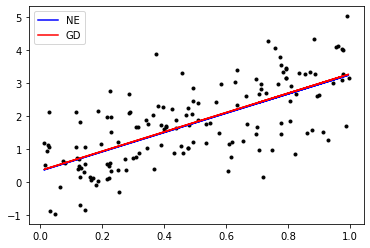

In [111]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()